TensorFlow:1.13.1
NumPy:1.16.3
Scikit Learn:0.21.2


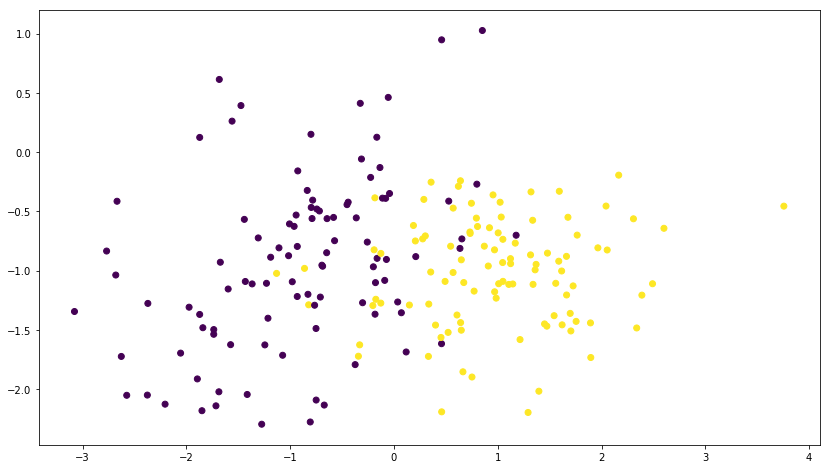

In [11]:
import tensorflow as tf
print('TensorFlow:{}'.format(tf.__version__))
import numpy as np
print('NumPy:{}'.format(np.__version__))

import matplotlib.pyplot as plt

import sklearn as sk
print('Scikit Learn:{}'.format(sk.__version__))
from sklearn import datasets as skds
from sklearn import model_selection as skms
from sklearn import preprocessing as skpp


num_outputs = 2
num_inputs = 2
X, y = skds.make_classification(n_samples=200,
                                n_features=num_inputs,
                                n_informative=2,
                                n_redundant=0,
                                n_repeated=0,
                                n_classes=num_outputs,
                                n_clusters_per_class=1)


plt.figure(figsize=(14, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

In [12]:
print(y[0:5])
y = np.eye(num_outputs)[y]
print(y[0:5])
X_train, X_test, y_train, y_test = skms.train_test_split(
    X, y, test_size=.4, random_state=42)

[1 0 1 1 0]
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


epoch 0000 accuracy=0.88749999


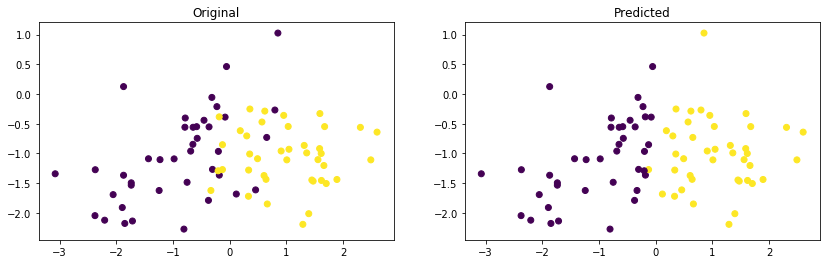

In [17]:
num_outputs = y_train.shape[1]
num_inputs = X_train.shape[1]

learning_rate = 0.001

#
x = tf.placeholder(dtype=tf.float32, shape=[None, num_inputs], name='x')
y = tf.placeholder(dtype=tf.float32, shape=[None, num_outputs], name='y')
w = tf.Variable(tf.zeros([num_inputs, num_outputs]), name='w')
b = tf.Variable(tf.zeros([num_outputs]), name='b')

model = tf.nn.sigmoid(tf.matmul(x, w) + b)

loss = tf.reduce_mean(-tf.reduce_sum(
    (y * tf.log(model)) + ((1-y) * tf.log(1 - model)), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

num_epochs = 1
with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        tfs.run(optimizer, feed_dict={x: X_train, y: y_train})
        y_pred = tfs.run(tf.argmax(model, 1), feed_dict={x: X_test})
        y_orig = tfs.run(tf.argmax(y, 1), feed_dict={y: y_test})
        
        preds_check = tf.equal(y_pred, y_orig)
        accuracy_op = tf.reduce_mean(tf.cast(preds_check, tf.float32))
        accuracy_score = tfs.run(accuracy_op)
        print('epoch {0:04d} accuracy={1:.8f}'.format(epoch, accuracy_score))
        
        plt.figure(figsize=(14, 4))
        plt.subplot(1, 2, 1)
        plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_orig)
        plt.title('Original')
        plt.subplot(1, 2, 2)
        plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_pred)
        plt.title('Predicted')
        plt.show()